# Setup

In [3]:
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

    
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
#mnist = load_digits()
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [ ]:
# Digit
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# plot_digit(X[0])
    
    
# Digits
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.figure(figsize=(9,9))
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
# plot_digits(X[:100]) 

# 1.Prep

## Split

In [6]:
X, y = mnist["data"], mnist["target"].astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 2.Classification

In [7]:
from sklearn.model_selection import cross_val_predict # returns outputs for each fold, deafault: prediction
from sklearn.model_selection import cross_val_score # returns score for each fold, default: accuracy

### Algorithms
* Binary  
SGDClassifier  
RandomForestClassifier
* Multiclass  
svc (C-Support Vector Classifier)  
OneVsRestClassifier

## 1.Binary classifiers 

In [8]:
# 5 against the rest
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## 1.1.SGD Classifier

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
sgd_clf = SGDClassifier(random_state=42)
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

## 1.2.Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

# 4.Evaluation

### Metrics  
    1.Precision  
    2.Recall  
    3.f1_score (Harmonic Mean of Precision and Recall)  
### Curves  
    4.Precision vs Recall  
    5.Precision-Recall vs Threshold  
    6.ROC  
    7.ROC AUC

In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,\
                            f1_score, precision_recall_curve, roc_curve, \
                            roc_auc_score

In [14]:
def scores(pr,re,f1):
    print (f'Precision: {pr}' , '\n' + f'Recall: {re}', '\n' + f'f1: {f1}')


def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(8, 6))
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)
    
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 4))                                              
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

## SGDClassifier

### Confusion Matrix

True (correct)(predict) Positive (class)(actual): cm[0][0]  
True (correct) Negative (class): cm[1][1]  
False (incorrect) Positive (class): cm[0][1]  
False (incorrect) Negative (class): cm[1][0]

In [15]:
cm = confusion_matrix(y_train_5, sgd_pred)

### Precision, Recall, f1

In [17]:
pr = precision_score(y_train_5, sgd_pred)
#cm[1, 1] / (cm[0, 1] + cm[1, 1])

re = recall_score(y_train_5, sgd_pred)
#cm[1, 1] / (cm[1, 0] + cm[1, 1])

f1 = f1_score(y_train_5, sgd_pred)
# cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

scores(pr, re, f1)

Precision: 0.8370879772350012 
Recall: 0.6511713705958311 
f1: 0.7325171197343846


### 4.Precision vs Recall  

In [21]:
sgd_y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]

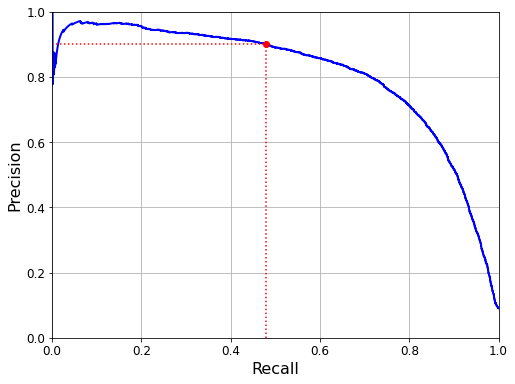

In [29]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, sgd_y_scores)

plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

### 5.Precision-Recall vs Threshold  

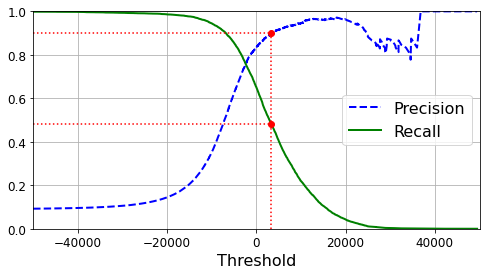

In [23]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

### 6.ROC

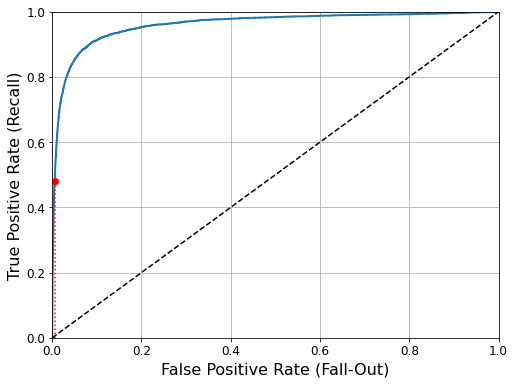

In [24]:
fpr, tpr, thresholds = roc_curve(y_train_5, sgd_y_scores)

plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

### 7.ROC Area Under Curve

In [25]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## Random Forest Classifier

### Confusion Matrix

### Precision, Recall, f1

### 4.Precision vs Recall  

### 5.Precision-Recall vs Threshold  

### 6.ROC

### 7.ROC vs AUC 

# 5.Tuning

### GridSearchCV

### RandomizedSearchCV